<a href="https://colab.research.google.com/github/carolvieirav/operalabs/blob/main/diesel_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/oleo diesel base.csv', parse_dates=["data"], index_col="data")

In [3]:
df.drop('Unnamed: 0', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [4]:
mask = df.index <= '2022-03-16'
df = df.loc[mask]

In [5]:
df.head()

,valor_dolar,valor_selic,valor_barril,valor_oleo_diesel,valor_ipca
data,,,,,
2012-01-02,1.7376,0.039270,193.79,2.040,0.47
2012-01-03,1.7152,0.039270,210.87,2.042,0.26
2012-01-04,1.7152,0.039270,210.87,2.042,0.26
2012-01-05,1.7152,0.039270,210.87,2.042,0.26
2012-01-06,2.0350,0.031976,185.79,2.045,0.07


In [6]:
df.describe()

,valor_dolar,valor_selic,valor_barril,valor_oleo_diesel,valor_ipca
count,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000
mean,3.500505,0.032195,224.446305,3.124171,0.447105
std,1.151149,0.013411,69.854573,0.775228,0.209740
min,1.702400,0.007469,112.040000,2.038000,-0.060000
25%,2.367550,0.024620,175.970000,2.501000,0.250000
50%,3.310300,0.030177,210.930000,3.024000,0.460000
75%,4.077150,0.041957,247.625000,3.530000,0.600000
max,5.937200,0.052531,454.660000,5.359000,0.920000


In [7]:
df.corr()

,valor_dolar,valor_selic,valor_barril,valor_oleo_diesel,valor_ipca
valor_dolar,1.000000,-0.518481,0.491160,0.856411,0.025854
valor_selic,-0.518481,1.000000,-0.477448,-0.389870,0.356779
valor_barril,0.491160,-0.477448,1.000000,0.709226,0.248578
valor_oleo_diesel,0.856411,-0.389870,0.709226,1.000000,0.117430
valor_ipca,0.025854,0.356779,0.248578,0.117430,1.000000


In [8]:
df.resample("M").count()

,valor_dolar,valor_selic,valor_barril,valor_oleo_diesel,valor_ipca
data,,,,,
2012-01-31,30,30,30,30,30
2012-02-29,29,29,29,29,29
2012-03-31,31,31,31,31,31
2012-04-30,30,30,30,30,30
2012-05-31,31,31,31,31,31
...,...,...,...,...,...
2021-11-30,30,30,30,30,30
2021-12-31,31,31,31,31,31
2022-01-31,31,31,31,31,31


# TRENDS

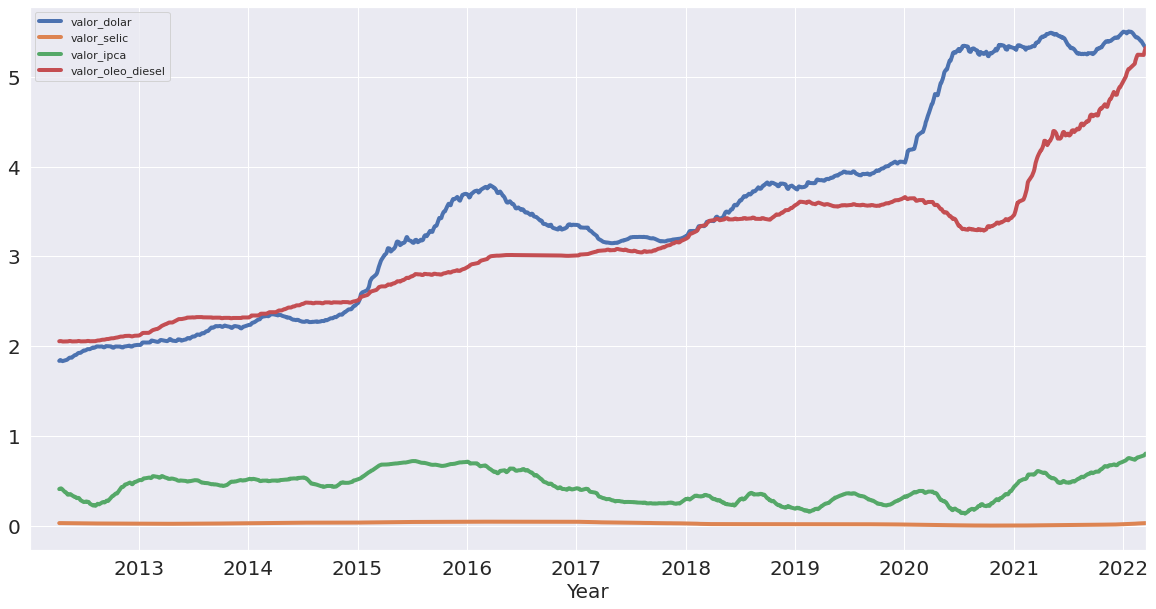

In [9]:
df[['valor_dolar','valor_selic', 'valor_ipca', 'valor_oleo_diesel']].rolling(100).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Year', fontsize=20);

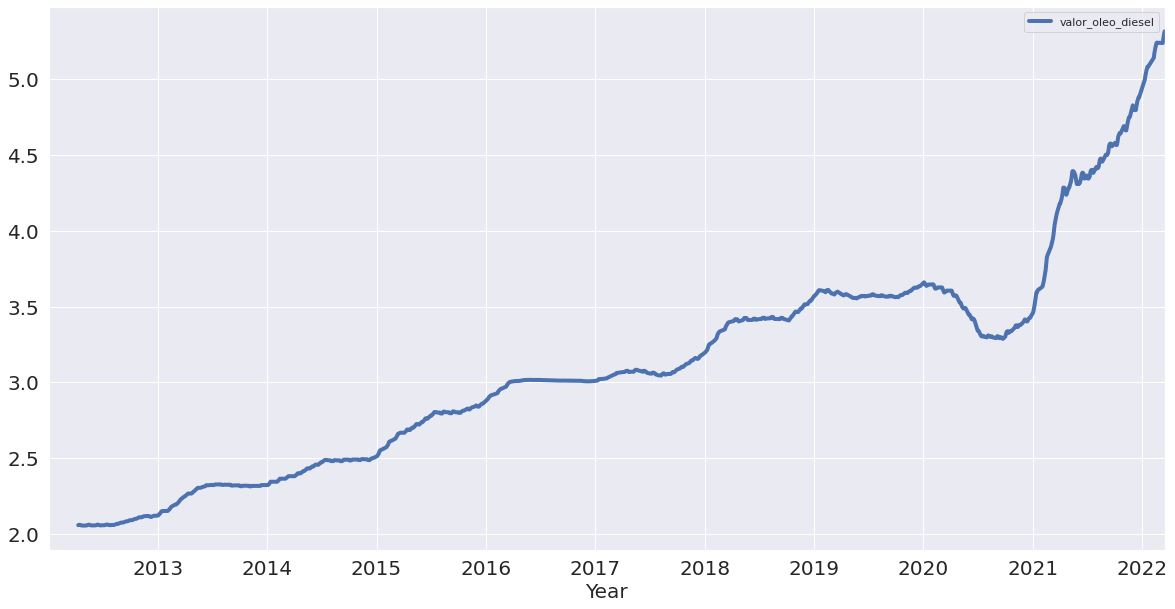

In [10]:
diesel = df[['valor_oleo_diesel']]
diesel.rolling(100).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Year', fontsize=20);

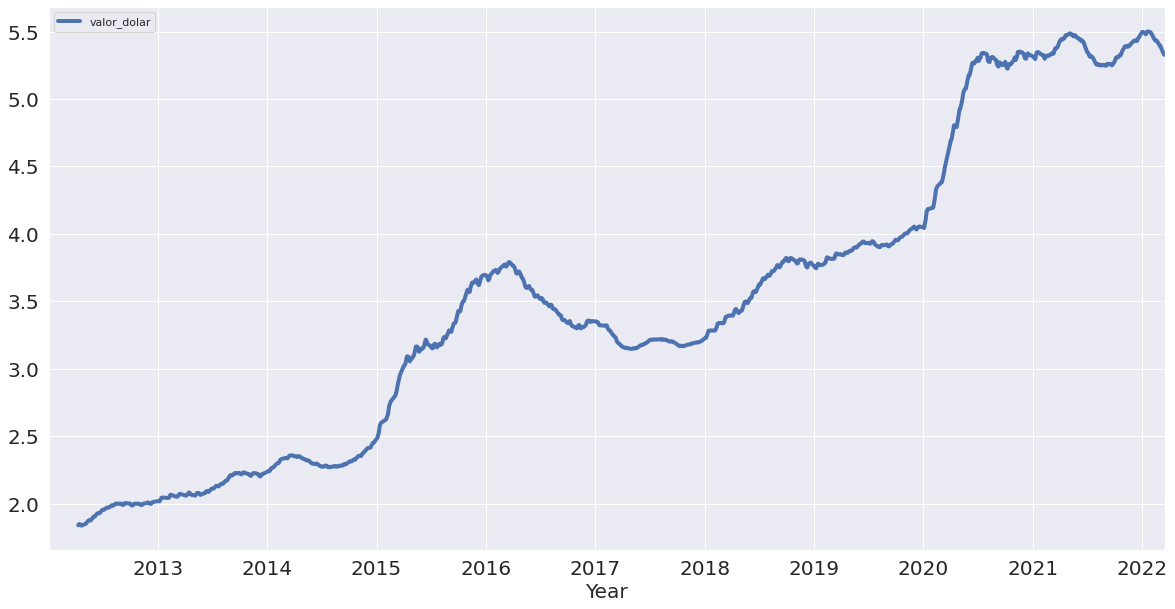

In [11]:
dolar = df[['valor_dolar']]
dolar.rolling(100).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Year', fontsize=20);

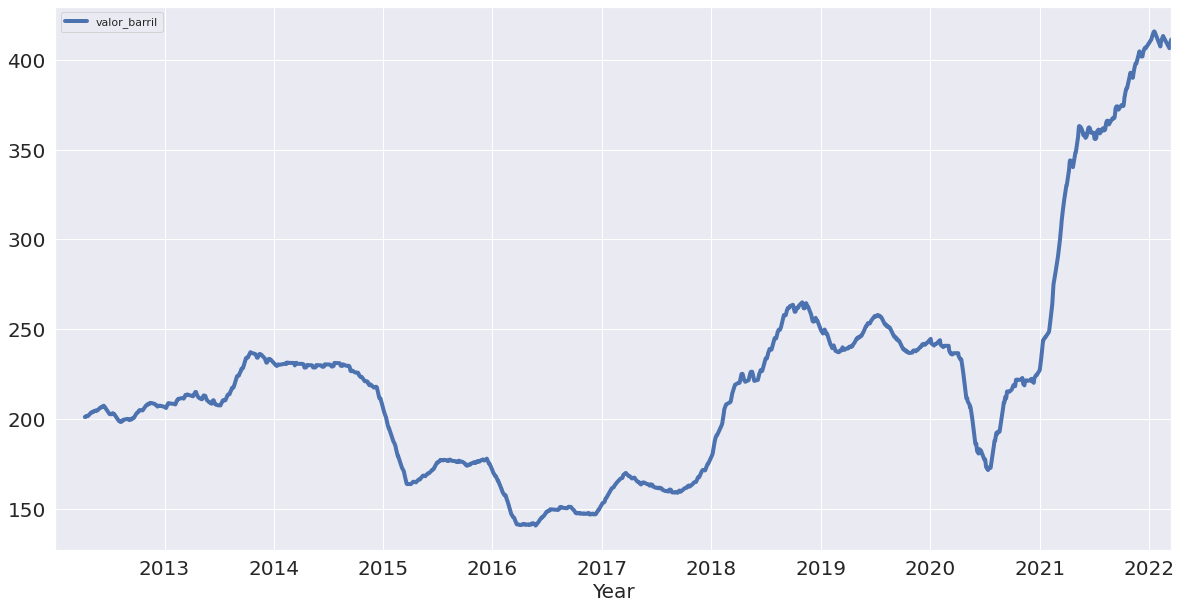

In [12]:
barril = df[['valor_barril']]
barril.rolling(100).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Year', fontsize=20);

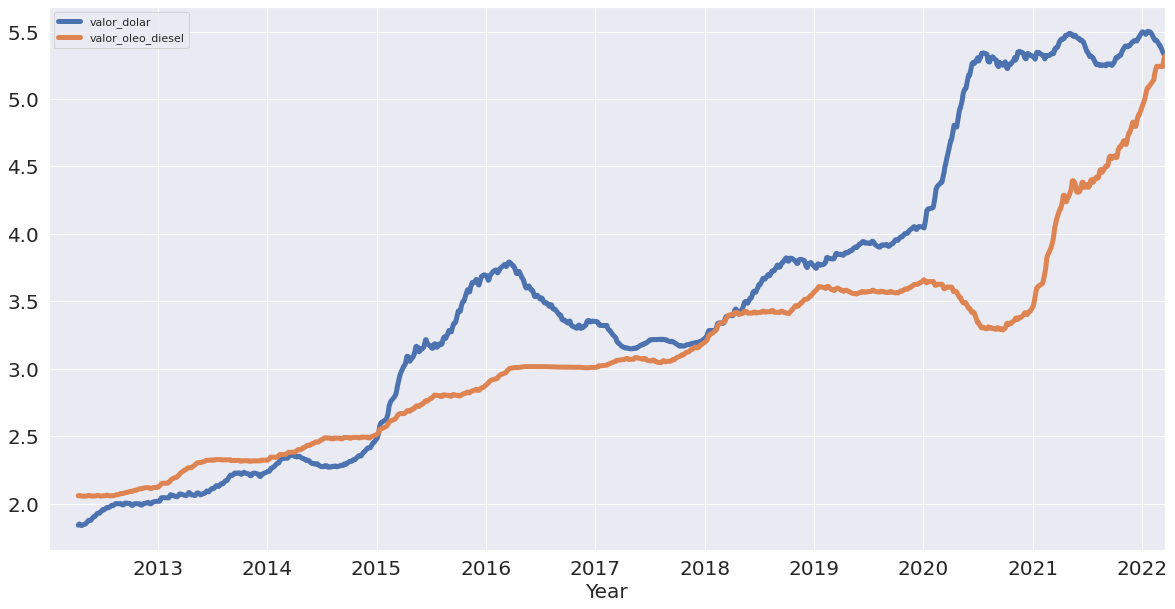

In [13]:
df_rm = pd.concat([dolar.rolling(100).mean(), diesel.rolling(100).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

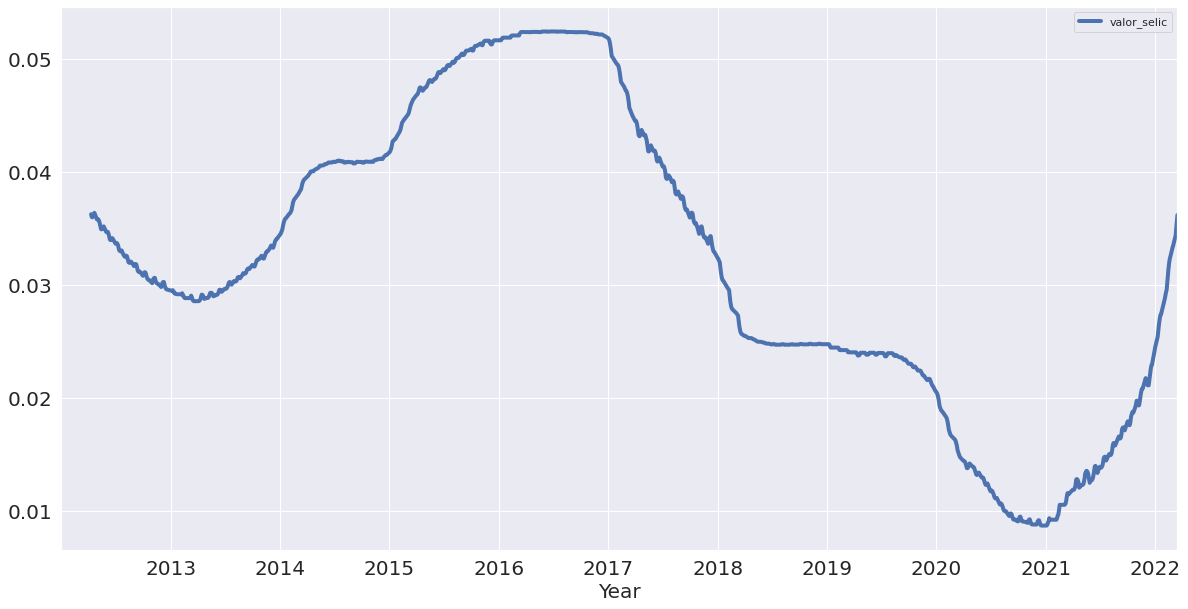

In [14]:
selic = df[['valor_selic']]
selic.rolling(100).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Year', fontsize=20);

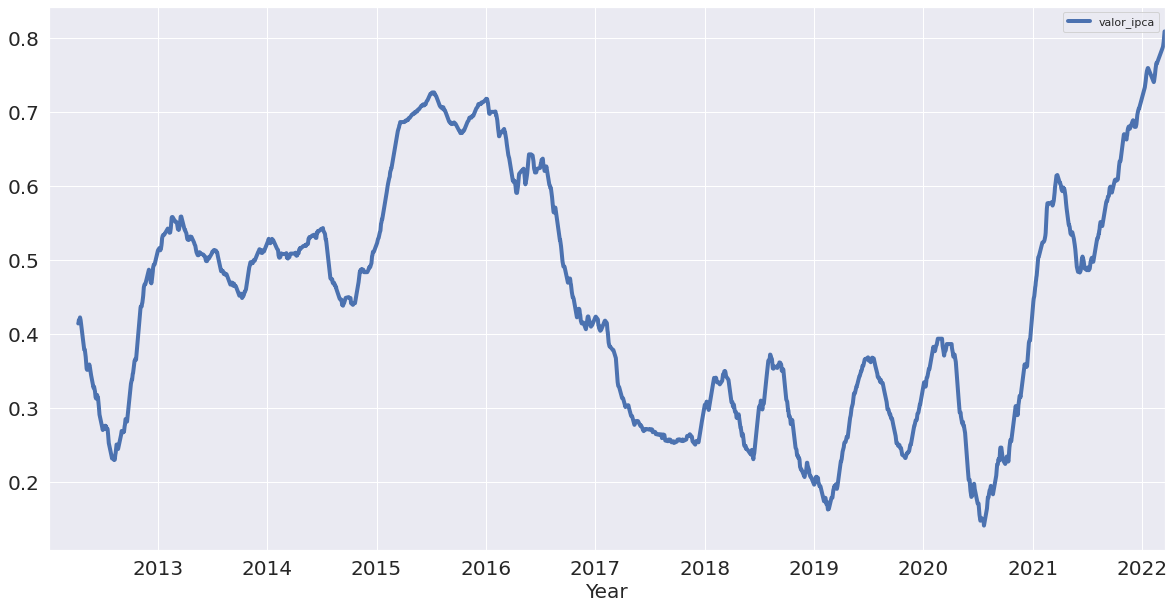

In [15]:
ipca = df[['valor_ipca']]
ipca.rolling(100).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Seasonal Patterns 

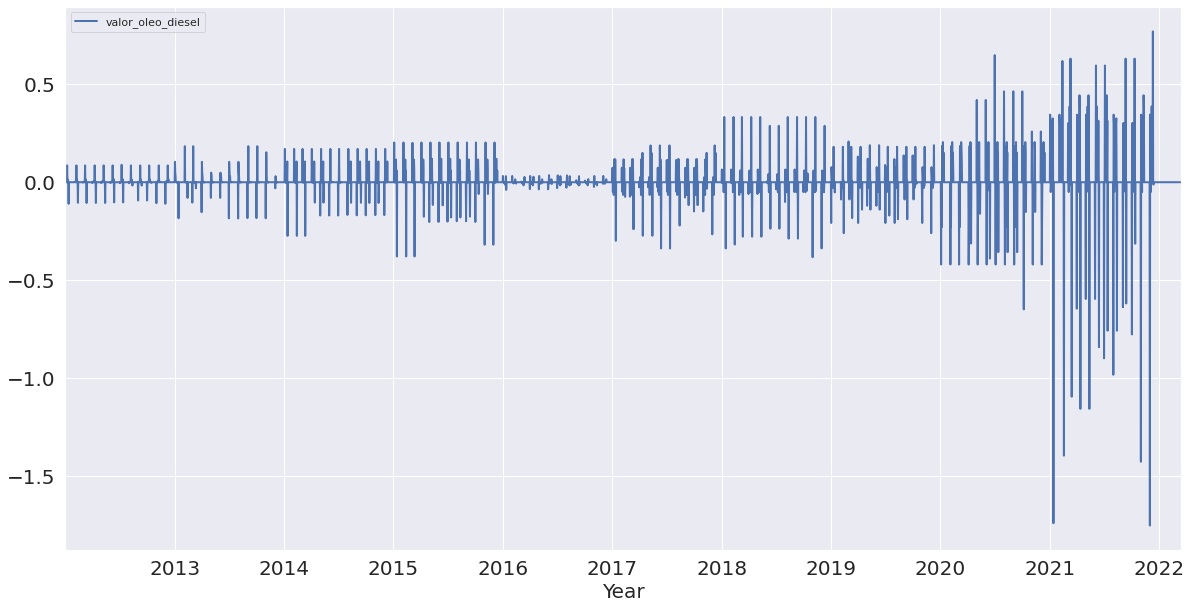

In [16]:
diesel.diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Regressão Linear

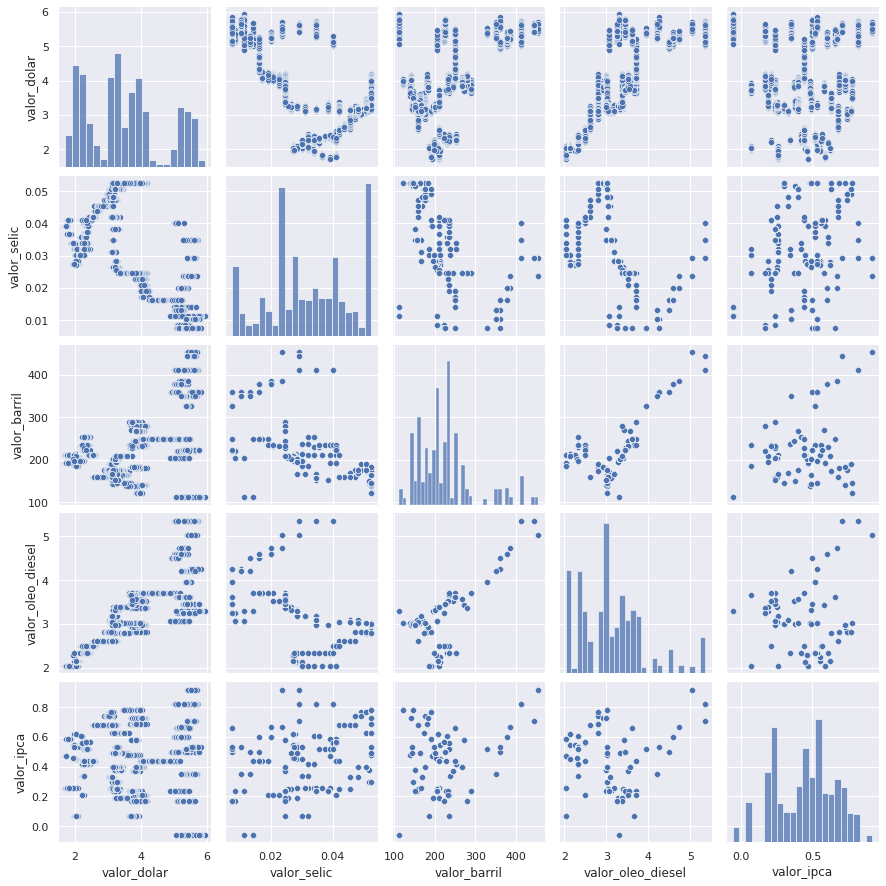

In [17]:
sns.pairplot(df)

In [18]:
X = df[['valor_dolar','valor_barril','valor_ipca','valor_selic']]
y = df['valor_oleo_diesel']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=43)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_test = model.predict(X_test)

In [22]:
y_pred = model.predict(X)

In [23]:
r2_score(y, y_pred)

0.8837886841467189